# Projet Python

## Question 1

On commence par importer les données des fichiers `json` et à les regrouper dans un dataframe.

In [22]:
import json
import os
import pandas as pd

def flatten_json(nested_json, parent_key='', sep='.'):
    items = []
    for key, value in nested_json.items():
        new_key = f"{parent_key}{sep}{key}" if parent_key else key
        if isinstance(value, dict):
            items.extend(flatten_json(value, new_key, sep=sep).items())
        elif isinstance(value, list):
            for i, item in enumerate(value):
                items.extend(flatten_json(item, f"{new_key}[{i}]", sep=sep).items())
        else:
            items.append((new_key, value))
    return dict(items)

directory = r"data"

all_data = []

for filename in os.listdir(directory):
    if filename.endswith('.json'):
        filepath = os.path.join(directory, filename)
        with open(filepath, "r", encoding="utf-8") as file:
            json_data = json.load(file)
            
            if 'results' in json_data and 'participants' in json_data['results']:
                for participant in json_data['results']['participants']:
                    flattened_participant = flatten_json(participant)
                    all_data.append(flattened_participant)

series = pd.DataFrame(all_data)

series.head()

,affiliation,avg_pace,calories,class,distance,id,lane,logbook_id,logged_time,machine_type,participant,place,score,serial_number,splits[0].split_avg_pace,splits[0].split_calories,splits[0].split_distance,splits[0].split_drag_factor,splits[0].split_running_calories,splits[0].split_running_distance,splits[0].split_running_time,splits[0].split_stroke_count,splits[0].split_stroke_rate,splits[0].split_time,splits[0].split_type,splits[1].split_avg_pace,splits[1].split_calories,splits[1].split_distance,splits[1].split_drag_factor,splits[1].split_running_calories,splits[1].split_running_distance,splits[1].split_running_time,splits[1].split_stroke_count,splits[1].split_stroke_rate,splits[1].split_time,splits[1].split_type,splits[2].split_avg_pace,splits[2].split_calories,splits[2].split_distance,splits[2].split_drag_factor,splits[2].split_running_calories,splits[2].split_running_distance,splits[2].split_running_time,splits[2].split_stroke_count,splits[2].split_stroke_rate,splits[2].split_time,splits[2].split_type,splits[3].split_avg_pace,splits[3].split_calories,splits[3].split_distance,splits[3].split_drag_factor,splits[3].split_running_calories,splits[3].split_running_distance,splits[3].split_running_time,splits[3].split_stroke_count,splits[3].split_stroke_rate,splits[3].split_time,splits[3].split_type,spm,time
0,,1:38.3,171,,2000,,4,,22/01/2023 10:59:00,row,Maxime,1,6:33.4,530392424,1:41.6,41,500,128,41,500,1016,44,26,1016,distance_split,1:42.0,40,500,128,81,1000,2036,43,25,1020,distance_split,1:37.6,43,500,128,124,1500,3012,47,29,976,distance_split,1:32.1,47,500,128,171,2000,3933,52,34,921,distance_split,28,6:33.4
1,,1:45.4,154,,2000,,2,,22/01/2023 10:59:00,row,Célestin,2,7:01.8,530087901,1:43.1,40,500,118,40,500,1031,46,27,1031,distance_split,1:46.9,38,500,118,78,1000,2100,44,25,1069,distance_split,1:47.3,37,500,118,115,1500,3173,50,28,1073,distance_split,1:44.4,39,500,118,154,2000,4217,59,34,1044,distance_split,28,7:01.8
2,,1:56.7,135,,2000,,1,,22/01/2023 11:00:00,row,Julien,3,7:47.0,530398582,1:56.4,34,500,109,34,500,1164,48,25,1164,distance_split,2:00.5,33,500,108,67,1000,2369,49,24,1205,distance_split,1:55.2,34,500,108,101,1500,3521,54,28,1152,distance_split,1:54.8,34,500,109,135,2000,4669,59,31,1148,distance_split,26,7:47.0
3,,2:03.1,128,,2000,,3,,22/01/2023 11:01:00,row,Neve,4,8:12.4,430839301,2:03.5,32,500,107,32,500,1235,54,26,1235,distance_split,2:07.2,31,500,107,63,1000,2507,52,25,1272,distance_split,2:02.8,32,500,107,95,1500,3735,58,28,1228,distance_split,1:58.8,33,500,108,128,2000,4923,65,33,1188,distance_split,27,8:12.4
4,,1:59.3,131,,2000,,3,,22/01/2023 09:51:00,row,Eric,1,7:57.3,430839301,1:59.4,33,500,120,33,500,1194,56,28,1194,distance_split,2:01.2,32,500,120,65,1000,2406,53,26,1212,distance_split,2:01.2,32,500,120,97,1500,3618,54,27,1212,distance_split,1:55.5,34,500,120,131,2000,4773,56,29,1155,distance_split,27,7:57.3


In [24]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
series = series.set_index('participant')
series

,affiliation,avg_pace,calories,class,distance,id,lane,logbook_id,logged_time,machine_type,place,score,serial_number,splits[0].split_avg_pace,splits[0].split_calories,splits[0].split_distance,splits[0].split_drag_factor,splits[0].split_running_calories,splits[0].split_running_distance,splits[0].split_running_time,splits[0].split_stroke_count,splits[0].split_stroke_rate,splits[0].split_time,splits[0].split_type,splits[1].split_avg_pace,splits[1].split_calories,splits[1].split_distance,splits[1].split_drag_factor,splits[1].split_running_calories,splits[1].split_running_distance,splits[1].split_running_time,splits[1].split_stroke_count,splits[1].split_stroke_rate,splits[1].split_time,splits[1].split_type,splits[2].split_avg_pace,splits[2].split_calories,splits[2].split_distance,splits[2].split_drag_factor,splits[2].split_running_calories,splits[2].split_running_distance,splits[2].split_running_time,splits[2].split_stroke_count,splits[2].split_stroke_rate,splits[2].split_time,splits[2].split_type,splits[3].split_avg_pace,splits[3].split_calories,splits[3].split_distance,splits[3].split_drag_factor,splits[3].split_running_calories,splits[3].split_running_distance,splits[3].split_running_time,splits[3].split_stroke_count,splits[3].split_stroke_rate,splits[3].split_time,splits[3].split_type,spm,time
participant,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Maxime,,1:38.3,171,,2000,,4,,22/01/2023 10:59:00,row,1,6:33.4,530392424,1:41.6,41,500,128,41,500,1016,44,26,1016,distance_split,1:42.0,40,500,128,81,1000,2036,43,25,1020,distance_split,1:37.6,43,500,128,124,1500,3012,47,29,976,distance_split,1:32.1,47,500,128,171,2000,3933,52,34,921,distance_split,28,6:33.4
Célestin,,1:45.4,154,,2000,,2,,22/01/2023 10:59:00,row,2,7:01.8,530087901,1:43.1,40,500,118,40,500,1031,46,27,1031,distance_split,1:46.9,38,500,118,78,1000,2100,44,25,1069,distance_split,1:47.3,37,500,118,115,1500,3173,50,28,1073,distance_split,1:44.4,39,500,118,154,2000,4217,59,34,1044,distance_split,28,7:01.8
Julien,,1:56.7,135,,2000,,1,,22/01/2023 11:00:00,row,3,7:47.0,530398582,1:56.4,34,500,109,34,500,1164,48,25,1164,distance_split,2:00.5,33,500,108,67,1000,2369,49,24,1205,distance_split,1:55.2,34,500,108,101,1500,3521,54,28,1152,distance_split,1:54.8,34,500,109,135,2000,4669,59,31,1148,distance_split,26,7:47.0
Neve,,2:03.1,128,,2000,,3,,22/01/2023 11:01:00,row,4,8:12.4,430839301,2:03.5,32,500,107,32,500,1235,54,26,1235,distance_split,2:07.2,31,500,107,63,1000,2507,52,25,1272,distance_split,2:02.8,32,500,107,95,1500,3735,58,28,1228,distance_split,1:58.8,33,500,108,128,2000,4923,65,33,1188,distance_split,27,8:12.4
Eric,,1:59.3,131,,2000,,3,,22/01/2023 09:51:00,row,1,7:57.3,430839301,1:59.4,33,500,120,33,500,1194,56,28,1194,distance_split,2:01.2,32,500,120,65,1000,2406,53,26,1212,distance_split,2:01.2,32,500,120,97,1500,3618,54,27,1212,distance_split,1:55.5,34,500,120,131,2000,4773,56,29,1155,distance_split,27,7:57.3
Edouard,,2:00.9,130,,2000,,1,,22/01/2023 09:51:00,row,2,8:03.7,530398582,1:54.8,35,500,121,35,500,1148,59,31,1148,distance_split,2:05.5,31,500,120,66,1000,2403,60,29,1255,distance_split,2:05.3,31,500,120,97,1500,3656,61,29,1253,distance_split,1:58.1,33,500,120,130,2000,4837,62,31,1181,distance_split,30,8:03.7
Baptiste,,2:05.2,125,,2000,,2,,22/01/2023 09:52:00,row,3,8:21.1,530087901,1:58.6,33,500,119,33,500,1186,53,27,1186,distance_split,2:05.4,31,500,119,64,1000,2440,50,24,1254,distance_split,2:10.7,30,500,118,94,1500,3747,49,23,1307,distance_split,2:06.5,31,500,118,125,2000,5012,56,27,1265,distance_split,24,8:21.1
Loïs,,2:06.0,124,,2000,,4,,22/01/2023 09:52:00,row,4,8:24.1,430321703,1:59.1,33,500,116,33,500,1191,61,31,1191,distance_split,2:10.2,30,500,115,63,1000,2493,62,29,1302,distance_split,2:09.4,30,500,115,93,1500,3787,65,30,1294,distance_split,2:05.4,31,500,115,124,2000,5041,66,32,1254,distance_split,30,8:24.1
Usama,,1:58.7,134,,2000,,2,,22/01/2023 10:02:00,row,1,7:54.8,530087901,1:52.8,36,500,118,36,500,1128,53,28,1128,distance_split,2:02.3,32

Conversion des légendes des colonnes en français :

In [26]:
series['total_split_stroke_count'] = (
    series['splits[0].split_stroke_count'] + 
    series['splits[1].split_stroke_count'] + 
    series['splits[2].split_stroke_count'] + 
    series['splits[3].split_stroke_count']
)

series['cadance moyenne sur 2000m'] = (
    series['splits[0].split_stroke_rate'] + series['splits[1].split_stroke_rate'] +
    series['splits[2].split_stroke_rate'] + series['splits[3].split_stroke_rate']
) / 4

Q1 = series.loc[:, [
    'time', 'cadance moyenne sur 2000m', 'total_split_stroke_count', 
    'splits[0].split_running_time', 'splits[1].split_running_time', 
    'splits[2].split_running_time', 'splits[3].split_running_time', 
    'splits[0].split_stroke_rate', 'splits[1].split_stroke_rate', 
    'splits[2].split_stroke_rate', 'splits[3].split_stroke_rate', 
    'splits[0].split_stroke_count', 'splits[1].split_stroke_count', 
    'splits[2].split_stroke_count', 'splits[3].split_stroke_count'
]]

Q1 = Q1.rename(columns={
    'time': 'Temps sur 2000m',
    'cadance moyenne sur 2000m': 'Cadance moyenne sur 2000m',
    'total_split_stroke_count': 'Nombre de coups de rames sur 2000m',
    'splits[0].split_running_time': 'Temps cumulé sur les 1ers 500m',
    'splits[1].split_running_time': 'Temps cumulé sur 1000m',
    'splits[2].split_running_time': 'Temps cumulé sur 1500m',
    'splits[3].split_running_time': 'Temps cumulé sur 2000m',
    'splits[0].split_stroke_rate': 'Cadance moyenne sur 1ers 500m',
    'splits[1].split_stroke_rate': 'Cadance moyenne sur 2emes 500m',
    'splits[2].split_stroke_rate': 'Cadance moyenne sur 3emes 500m',
    'splits[3].split_stroke_rate': 'Cadance moyenne sur 4emes 500m',
    'splits[0].split_stroke_count': 'Nombre de coups de rame sur 1ers 500m',
    'splits[1].split_stroke_count': 'Nombre de coups de rame sur 2emes 500m',
    'splits[2].split_stroke_count': 'Nombre de coups de rame sur 3emes 500m',
    'splits[3].split_stroke_count': 'Nombre de coups de rame sur 4emes 500m'
})

Q1.loc[:, 'Temps cumulé sur les 1ers 500m en secondes'] = Q1['Temps cumulé sur les 1ers 500m'] / 10
Q1.loc[:, 'Temps cumulé sur 1000m en secondes'] = Q1['Temps cumulé sur 1000m'] / 10
Q1.loc[:, 'Temps cumulé sur 1500m en secondes'] = Q1['Temps cumulé sur 1500m'] / 10
Q1.loc[:, 'Temps cumulé sur 2000m en secondes'] = Q1['Temps cumulé sur 2000m'] / 10

Q1

,Temps sur 2000m,Cadance moyenne sur 2000m,Nombre de coups de rames sur 2000m,Temps cumulé sur les 1ers 500m,Temps cumulé sur 1000m,Temps cumulé sur 1500m,Temps cumulé sur 2000m,Cadance moyenne sur 1ers 500m,Cadance moyenne sur 2emes 500m,Cadance moyenne sur 3emes 500m,Cadance moyenne sur 4emes 500m,Nombre de coups de rame sur 1ers 500m,Nombre de coups de rame sur 2emes 500m,Nombre de coups de rame sur 3emes 500m,Nombre de coups de rame sur 4emes 500m,Temps cumulé sur les 1ers 500m en secondes,Temps cumulé sur 1000m en secondes,Temps cumulé sur 1500m en secondes,Temps cumulé sur 2000m en secondes
participant,,,,,,,,,,,,,,,,,,,
Maxime,6:33.4,28.50,186,1016,2036,3012,3933,26,25,29,34,44,43,47,52,101.6,203.6,301.2,393.3
Célestin,7:01.8,28.50,199,1031,2100,3173,4217,27,25,28,34,46,44,50,59,103.1,210.0,317.3,421.7
Julien,7:47.0,27.00,210,1164,2369,3521,4669,25,24,28,31,48,49,54,59,116.4,236.9,352.1,466.9
Neve,8:12.4,28.00,229,1235,2507,3735,4923,26,25,28,33,54,52,58,65,123.5,250.7,373.5,492.3
Eric,7:57.3,27.50,219,1194,2406,3618,4773,28,26,27,29,56,53,54,56,119.4,240.6,361.8,477.3
Edouard,8:03.7,30.00,242,1148,2403,3656,4837,31,29,29,31,59,60,61,62,114.8,240.3,365.6,483.7
Baptiste,8:21.1,25.25,208,1186,2440,3747,5012,27,24,23,27,53,50,49,56,118.6,244.0,374.7,501.2
Loïs,8:24.1,30.50,254,1191,2493,3787,5041,31,29,30,32,61,62,65,66,119.1,249.3,378.7,504.1
Usama,7:54.8,27.00,214,1128,2351,3582,4749,28,26,25,29,53,53,52,56,112.8,235.1,358.2,474.9


In [28]:
if Q1['Temps sur 2000m'].dtype == 'object':
    Q1['Temps sur 2000m'] = Q1['Temps sur 2000m'].str.replace(':', '')
    Q1['Temps sur 2000m'] = pd.to_numeric(Q1['Temps sur 2000m'], errors='coerce')

In [30]:
Q1['Minutes'] = Q1['Temps sur 2000m'].apply(lambda x: int(x // 100))
Q1['Secondes'] = Q1['Temps sur 2000m'].apply(lambda x: (x % 100))

Q1['Minutes'] = pd.to_numeric(Q1['Minutes'])
Q1['Secondes'] = pd.to_numeric(Q1['Secondes'])

Q1['Temps total sur 2000m en secondes'] = Q1['Minutes'] * 60 + Q1['Secondes']

Q1

,Temps sur 2000m,Cadance moyenne sur 2000m,Nombre de coups de rames sur 2000m,Temps cumulé sur les 1ers 500m,Temps cumulé sur 1000m,Temps cumulé sur 1500m,Temps cumulé sur 2000m,Cadance moyenne sur 1ers 500m,Cadance moyenne sur 2emes 500m,Cadance moyenne sur 3emes 500m,Cadance moyenne sur 4emes 500m,Nombre de coups de rame sur 1ers 500m,Nombre de coups de rame sur 2emes 500m,Nombre de coups de rame sur 3emes 500m,Nombre de coups de rame sur 4emes 500m,Temps cumulé sur les 1ers 500m en secondes,Temps cumulé sur 1000m en secondes,Temps cumulé sur 1500m en secondes,Temps cumulé sur 2000m en secondes,Minutes,Secondes,Temps total sur 2000m en secondes
participant,,,,,,,,,,,,,,,,,,,,,,
Maxime,633.4,28.50,186,1016,2036,3012,3933,26,25,29,34,44,43,47,52,101.6,203.6,301.2,393.3,6,33.4,393.4
Célestin,701.8,28.50,199,1031,2100,3173,4217,27,25,28,34,46,44,50,59,103.1,210.0,317.3,421.7,7,1.8,421.8
Julien,747.0,27.00,210,1164,2369,3521,4669,25,24,28,31,48,49,54,59,116.4,236.9,352.1,466.9,7,47.0,467.0
Neve,812.4,28.00,229,1235,2507,3735,4923,26,25,28,33,54,52,58,65,123.5,250.7,373.5,492.3,8,12.4,492.4
Eric,757.3,27.50,219,1194,2406,3618,4773,28,26,27,29,56,53,54,56,119.4,240.6,361.8,477.3,7,57.3,477.3
Edouard,803.7,30.00,242,1148,2403,3656,4837,31,29,29,31,59,60,61,62,114.8,240.3,365.6,483.7,8,3.7,483.7
Baptiste,821.1,25.25,208,1186,2440,3747,5012,27,24,23,27,53,50,49,56,118.6,244.0,374.7,501.2,8,21.1,501.1
Loïs,824.1,30.50,254,1191,2493,3787,5041,31,29,30,32,61,62,65,66,119.1,249.3,378.7,504.1,8,24.1,504.1
Usama,754.8,27.00,214,1128,2351,3582,4749,28,26,25,29,53,53,52,56,112.8,235.1,358.2,474.9,7,54.8,474.8


**Mise en forme finale :**

In [32]:
Q1['Temps sur 2000m'] = Q1['Temps total sur 2000m en secondes']
Q1['Temps cumulé sur les 1ers 500m'] = Q1['Temps cumulé sur les 1ers 500m en secondes']
Q1['Temps cumulé sur 1000m'] = Q1['Temps cumulé sur 1000m en secondes']
Q1['Temps cumulé sur 1500m'] = Q1['Temps cumulé sur 1500m en secondes']
Q1['Temps cumulé sur 2000m'] = Q1['Temps cumulé sur 2000m en secondes']
Q1.drop('Temps total sur 2000m en secondes', axis = 1, inplace = True)
Q1.drop('Temps cumulé sur les 1ers 500m en secondes', axis = 1, inplace = True)
Q1.drop('Temps cumulé sur 1000m en secondes', axis = 1, inplace = True)
Q1.drop('Temps cumulé sur 1500m en secondes', axis = 1, inplace = True)
Q1.drop('Temps cumulé sur 2000m en secondes', axis = 1, inplace = True)
Q1.drop('Minutes', axis = 1, inplace = True)
Q1.drop('Secondes', axis = 1, inplace = True)
Q1

,Temps sur 2000m,Cadance moyenne sur 2000m,Nombre de coups de rames sur 2000m,Temps cumulé sur les 1ers 500m,Temps cumulé sur 1000m,Temps cumulé sur 1500m,Temps cumulé sur 2000m,Cadance moyenne sur 1ers 500m,Cadance moyenne sur 2emes 500m,Cadance moyenne sur 3emes 500m,Cadance moyenne sur 4emes 500m,Nombre de coups de rame sur 1ers 500m,Nombre de coups de rame sur 2emes 500m,Nombre de coups de rame sur 3emes 500m,Nombre de coups de rame sur 4emes 500m
participant,,,,,,,,,,,,,,,
Maxime,393.4,28.50,186,101.6,203.6,301.2,393.3,26,25,29,34,44,43,47,52
Célestin,421.8,28.50,199,103.1,210.0,317.3,421.7,27,25,28,34,46,44,50,59
Julien,467.0,27.00,210,116.4,236.9,352.1,466.9,25,24,28,31,48,49,54,59
Neve,492.4,28.00,229,123.5,250.7,373.5,492.3,26,25,28,33,54,52,58,65
Eric,477.3,27.50,219,119.4,240.6,361.8,477.3,28,26,27,29,56,53,54,56
Edouard,483.7,30.00,242,114.8,240.3,365.6,483.7,31,29,29,31,59,60,61,62
Baptiste,501.1,25.25,208,118.6,244.0,374.7,501.2,27,24,23,27,53,50,49,56
Loïs,504.1,30.50,254,119.1,249.3,378.7,504.1,31,29,30,32,61,62,65,66
Usama,474.8,27.00,214,112.8,235.1,358.2,474.9,28,26,25,29,53,53,52,56


## Question 2

Calcul de la vitesse moyenne sur 2000m :

In [34]:
Q1['Vitesse moyenne sur 2000m en km/h'] = 2 / (Q1['Temps sur 2000m'] / 3600)

Vitesse moyenne sur chaque portion :

In [36]:
Q1['Vitesse moyenne sur les 1ers 500m en km/h'] = 0.5 / (Q1['Temps cumulé sur les 1ers 500m'] / 3600)
Q1['Vitesse moyenne sur les 2emes 500m en km/h'] = 0.5 / ((Q1['Temps cumulé sur 1000m'] - Q1['Temps cumulé sur les 1ers 500m']) / 3600)
Q1['Vitesse moyenne sur les 3emes 500m en km/h'] = 0.5 / ((Q1['Temps cumulé sur 1500m'] - Q1['Temps cumulé sur 1000m']) / 3600)
Q1['Vitesse moyenne sur les 4emes 500m en km/h'] = 0.5 / ((Q1['Temps cumulé sur 2000m'] - Q1['Temps cumulé sur 1500m']) / 3600)

Longueur moyenne parcourue par coup de rame sur la totalité du parcours :

In [38]:
Q1['Longueur moyenne par coup sur 2000m'] = 2000 / Q1['Nombre de coups de rames sur 2000m']

Longueur moyenne parcourue par coup de rame sur chaque portion :

In [41]:
Q1['Longueur moyenne par coup sur les 1ers 500m'] = 500 / Q1['Nombre de coups de rame sur 1ers 500m']
Q1['Longueur moyenne par coup sur les 2emes 500m'] = 500 / Q1['Nombre de coups de rame sur 2emes 500m']
Q1['Longueur moyenne par coup sur les 3emes 500m'] = 500 / Q1['Nombre de coups de rame sur 3emes 500m']
Q1['Longueur moyenne par coup sur les 4emes 500m'] = 500 / Q1['Nombre de coups de rame sur 4emes 500m']

Affichage des valeurs calculées :

In [44]:
Q2 = Q1[['Vitesse moyenne sur 2000m en km/h', 'Vitesse moyenne sur les 1ers 500m en km/h', 'Vitesse moyenne sur les 2emes 500m en km/h', 
          'Vitesse moyenne sur les 3emes 500m en km/h', 'Vitesse moyenne sur les 4emes 500m en km/h', 
          'Longueur moyenne par coup sur 2000m', 'Longueur moyenne par coup sur les 1ers 500m', 
          'Longueur moyenne par coup sur les 2emes 500m', 'Longueur moyenne par coup sur les 3emes 500m',
         'Longueur moyenne par coup sur les 4emes 500m']]

Q2

,Vitesse moyenne sur 2000m en km/h,Vitesse moyenne sur les 1ers 500m en km/h,Vitesse moyenne sur les 2emes 500m en km/h,Vitesse moyenne sur les 3emes 500m en km/h,Vitesse moyenne sur les 4emes 500m en km/h,Longueur moyenne par coup sur 2000m,Longueur moyenne par coup sur les 1ers 500m,Longueur moyenne par coup sur les 2emes 500m,Longueur moyenne par coup sur les 3emes 500m,Longueur moyenne par coup sur les 4emes 500m
participant,,,,,,,,,,
Maxime,18.301983,17.716535,17.647059,18.442623,19.543974,10.752688,11.363636,11.627907,10.638298,9.615385
Célestin,17.069701,17.458778,16.838167,16.775396,17.241379,10.050251,10.869565,11.363636,10.000000,8.474576
Julien,15.417559,15.463918,14.937759,15.625000,15.679443,9.523810,10.416667,10.204082,9.259259,8.474576
Neve,14.622258,14.574899,14.150943,14.657980,15.151515,8.733624,9.259259,9.615385,8.620690,7.692308
Eric,15.084852,15.075377,14.851485,14.851485,15.584416,9.132420,8.928571,9.433962,9.259259,8.928571
Edouard,14.885259,15.679443,14.342629,14.365523,15.241321,8.264463,8.474576,8.333333,8.196721,8.064516
Baptiste,14.368390,15.177066,14.354067,13.771997,14.229249,9.615385,9.433962,10.000000,10.204082,8.928571
Loïs,14.282880,15.113350,13.824885,13.910355,14.354067,7.874016,8.196721,8.064516,7.692308,7.575758
Usama,15.164280,15.957447,14.717907,14.622258,15.424165,9.345794,9.433962,9.433962,9.615385,8.928571


## Question 3

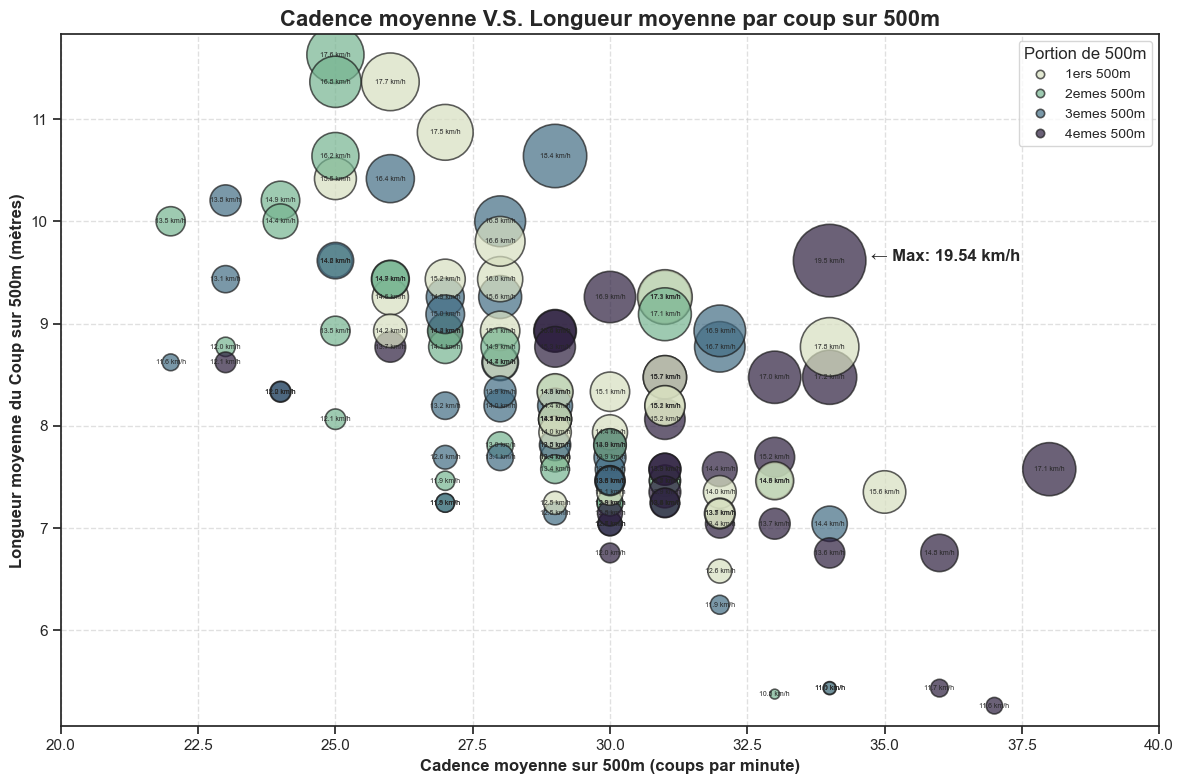

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="ticks")

cadence_moyenne_500m = Q1[['Cadance moyenne sur 1ers 500m', 'Cadance moyenne sur 2emes 500m', 
                           'Cadance moyenne sur 3emes 500m', 'Cadance moyenne sur 4emes 500m']].values.flatten()

longueur_moyenne_500m = Q1[['Longueur moyenne par coup sur les 1ers 500m',
                            'Longueur moyenne par coup sur les 2emes 500m', 
                            'Longueur moyenne par coup sur les 3emes 500m',
                            'Longueur moyenne par coup sur les 4emes 500m']].values.flatten()

vitesse_500m = Q1[['Vitesse moyenne sur les 1ers 500m en km/h', 'Vitesse moyenne sur les 2emes 500m en km/h', 
                   'Vitesse moyenne sur les 3emes 500m en km/h', 'Vitesse moyenne sur les 4emes 500m en km/h']].values.flatten()

index_max_vitesse = vitesse_500m.argmax()
cadence_vmax = cadence_moyenne_500m[index_max_vitesse]
longueur_vmax = longueur_moyenne_500m[index_max_vitesse]

vitesse_exp = np.exp(vitesse_500m / vitesse_500m.max() * 4)
vitesse_norm = 50 * vitesse_exp

plt.figure(figsize=(12, 8))

palette = sns.color_palette("ch:start=.5, rot=-.75", as_cmap=False, n_colors=4)
sns.scatterplot(x=cadence_moyenne_500m, y=longueur_moyenne_500m, hue=["1ers 500m", "2emes 500m", "3emes 500m", "4emes 500m"]*len(Q1),
                palette=palette, size=vitesse_norm, sizes=(50, vitesse_norm.max()), alpha=0.7, edgecolor='k', legend="brief")

for i in range(len(cadence_moyenne_500m)):
    plt.text(cadence_moyenne_500m[i], longueur_moyenne_500m[i], f"{vitesse_500m[i]:.1f} km/h", 
             fontsize=5, verticalalignment='center', horizontalalignment='center')

plt.text(cadence_vmax + 0.75, longueur_vmax, f"← Max: {vitesse_500m[index_max_vitesse]:.2f} km/h", fontsize=12, fontweight='bold', ha='left')

plt.xlabel('Cadence moyenne sur 500m (coups par minute)', fontsize=12, fontweight='bold')
plt.ylabel('Longueur moyenne du Coup sur 500m (mètres)', fontsize=12, fontweight='bold')
plt.title('Cadence moyenne V.S. Longueur moyenne par coup sur 500m', fontsize=16, fontweight='bold')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[0:4], labels=labels[0:4], title='Portion de 500m', fontsize=10)

plt.xlim(min(cadence_moyenne_500m) - 2, max(cadence_moyenne_500m) + 2)
plt.ylim(min(longueur_moyenne_500m) - 0.2, max(longueur_moyenne_500m) + 0.2)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Question bonus : création d'un dashboard

Code pour installer le package `dash` dans l'environnement `jupyter` :

In [68]:
!pip install dash


   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
    --------------------------------------- 0.1/7.5 MB 2.0 MB/s eta 0:00:04
   ------- -------------------------------- 1.5/7.5 MB 18.8 MB/s eta 0:00:01
   ----------- ---------------------------- 2.1/7.5 MB 22.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.3/7.5 MB 13.0 MB/s eta 0:00:01
   ------------------------ --------------- 4.6/7.5 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------  7.5/7.5 MB 28.1 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 26.5 MB/s eta 0:00:00


On cherche ici à créer un dashboard qui permet d'évaluer les performances de chaque participant.

In [73]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statistics import mean, stdev

df = Q1[['Vitesse moyenne sur 2000m en km/h', 'Vitesse moyenne sur les 1ers 500m en km/h', 'Vitesse moyenne sur les 2emes 500m en km/h', 
          'Vitesse moyenne sur les 3emes 500m en km/h', 'Vitesse moyenne sur les 4emes 500m en km/h', 
          'Longueur moyenne par coup sur 2000m', 'Longueur moyenne par coup sur les 1ers 500m', 
          'Longueur moyenne par coup sur les 2emes 500m', 'Longueur moyenne par coup sur les 3emes 500m',
         'Longueur moyenne par coup sur les 4emes 500m']]

df.index = df.index.astype(str)

def reshape_data(df, columns_map):
    data_long = []
    for participant in df.index:
        participant_data = df.loc[participant]
        for portion, column_name in columns_map.items():
            data_long.append({
                'participant': participant,
                'portion': portion,
                'value': participant_data[column_name]
            })
    return pd.DataFrame(data_long)

vitesse_columns = {
    '500m_1': 'Vitesse moyenne sur les 1ers 500m en km/h',
    '500m_2': 'Vitesse moyenne sur les 2emes 500m en km/h',
    '500m_3': 'Vitesse moyenne sur les 3emes 500m en km/h',
    '500m_4': 'Vitesse moyenne sur les 4emes 500m en km/h'
}

longueur_columns = {
    '500m_1': 'Longueur moyenne par coup sur les 1ers 500m',
    '500m_2': 'Longueur moyenne par coup sur les 2emes 500m',
    '500m_3': 'Longueur moyenne par coup sur les 3emes 500m',
    '500m_4': 'Longueur moyenne par coup sur les 4emes 500m'
}

correlation_columns = [
    'Vitesse moyenne sur 2000m en km/h', 
    'Vitesse moyenne sur les 1ers 500m en km/h', 
    'Vitesse moyenne sur les 2emes 500m en km/h', 
    'Vitesse moyenne sur les 3emes 500m en km/h', 
    'Vitesse moyenne sur les 4emes 500m en km/h', 
    'Longueur moyenne par coup sur 2000m', 
    'Longueur moyenne par coup sur les 1ers 500m', 
    'Longueur moyenne par coup sur les 2emes 500m', 
    'Longueur moyenne par coup sur les 3emes 500m', 
    'Longueur moyenne par coup sur les 4emes 500m'
]

vitesse_df = reshape_data(df, vitesse_columns)
vitesse_df.rename(columns={'value': 'vitesse_moyenne_500m'}, inplace=True)

longueur_df = reshape_data(df, longueur_columns)
longueur_df.rename(columns={'value': 'longueur_moyenne_coup_500m'}, inplace=True)

app = dash.Dash(__name__)

couleurs = px.colors.qualitative.Plotly

app.layout = html.Div([
    html.H1("Dashboard", style={'textAlign': 'center', 'marginBottom': 30, 'color': 'red'}),
    
    html.Div([
        dcc.Dropdown(
            id='participant-dropdown',
            options=[{'label': rameur, 'value': rameur} for rameur in df.index],
            value=[df.index[0]],
            multi=True,
            placeholder="Sélectionnez un ou plusieurs participants"
        ),
    ], style={'width': '50%', 'margin': 'auto', 'marginBottom': 30}),
    
    html.Div([
        html.Div([
            dcc.Graph(id='graph-vitesse-500m', style={'width': '50%', 'display': 'inline-block'}),
            dcc.Graph(id='graph-longueur-coup-500m', style={'width': '50%', 'display': 'inline-block'}),
        ]),
        
        html.Div([
            dcc.Graph(id='graph-temps-champions', style={'width': '50%', 'display': 'inline-block'}),
            dcc.Graph(id='graph-correlation', style={'width': '50%', 'display': 'inline-block'}),
        ]),
        
        html.Div([
            html.Div([
                dcc.Graph(id='graph-pace-variation', style={'width': '50%', 'display': 'inline-block'}),
                dcc.Graph(id='graph-efficiency-score', style={'width': '50%', 'display': 'inline-block'}),
            ]),
            
            html.Div(id='stats-summary', style={
                'width': '90%',
                'margin': '20px auto',
                'padding': '20px',
                'backgroundColor': '#f8f9fa',
                'borderRadius': '10px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)'
            })
        ])
    ])
])

@app.callback(
    [Output('graph-vitesse-500m', 'figure'),
     Output('graph-longueur-coup-500m', 'figure'),
     Output('graph-temps-champions', 'figure'),
     Output('graph-correlation', 'figure'),
     Output('graph-pace-variation', 'figure'),
     Output('graph-efficiency-score', 'figure'),
     Output('stats-summary', 'children')],
    [Input('participant-dropdown', 'value')]
)
def update_graphs(selected_participants):
    if not selected_participants:
        selected_participants = [df.index[0]]
    
    mask_vitesse = vitesse_df['participant'].isin(selected_participants)
    filtered_vitesse = vitesse_df[mask_vitesse]

    fig_vitesse = px.line(filtered_vitesse, 
                         x='portion', 
                         y='vitesse_moyenne_500m',
                         color='participant',
                         color_discrete_sequence=couleurs,
                         markers=True,
                         labels={'portion': 'Portion de 500m', 
                                'vitesse_moyenne_500m': 'Vitesse Moyenne (km/h)',
                                'participant': 'Participant'},
                         title='Vitesse Moyenne par portion de 500m')
    
    mask_longueur = longueur_df['participant'].isin(selected_participants)
    filtered_longueur = longueur_df[mask_longueur]

    fig_longueur = px.line(filtered_longueur, 
                          x='portion', 
                          y='longueur_moyenne_coup_500m',
                          color='participant',
                          color_discrete_sequence=couleurs,
                          markers=True,
                          labels={'portion': 'portion de 500m', 
                                 'longueur_moyenne_coup_500m': 'Longueur Moyenne du Coup (m)',
                                 'participant': 'participant'},
                          title='Longueur Moyenne des Coups de Rame par portion de 500m')

    temps_participants = []
    for participant in selected_participants:
        vitesses = df.loc[participant, [
            'Vitesse moyenne sur les 1ers 500m en km/h',
            'Vitesse moyenne sur les 2emes 500m en km/h',
            'Vitesse moyenne sur les 3emes 500m en km/h',
            'Vitesse moyenne sur les 4emes 500m en km/h'
        ]]
        
        temps_sections = (0.5 / (vitesses / 3600)).round(2)
        temps_cumules = np.cumsum(temps_sections)
        
        for idx, temps in enumerate(temps_cumules):
            temps_participants.append({
                'portion': f'500m_{idx+1}',
                'temps': temps,
                'participant': participant
            })
    
    df_temps = pd.DataFrame(temps_participants)
    temps_reference = pd.DataFrame({
        'portion': ['500m_1', '500m_2', '500m_3', '500m_4'],
        'temps': [85, 175, 267, 360],
        'participant': 'Référence'
    })
    
    df_temps_combined = pd.concat([df_temps, temps_reference])

    fig_champions = px.line(df_temps_combined,
                          x='portion',
                          y='temps',
                          color='participant',
                          color_discrete_sequence=couleurs,
                          markers=True,
                          labels={'portion': 'Portion de 500m',
                                 'temps': 'Temps Cumulé (s)',
                                 'participant': 'Participant'},
                          title='Comparaison des Temps Cumulés')

    for trace in fig_champions.data:
        if trace.name == 'Référence':
            trace.line.dash = 'dash'
            trace.line.color = 'red'
            trace.line.width = 2

    selected_df = df.loc[selected_participants, correlation_columns]
    corr_matrix = selected_df.corr()
    
    simplified_names = {
        'Vitesse moyenne sur 2000m en km/h': 'Vitesse 2000m',
        'Vitesse moyenne sur les 1ers 500m en km/h': 'Vitesse 500m-1',
        'Vitesse moyenne sur les 2emes 500m en km/h': 'Vitesse 500m-2',
        'Vitesse moyenne sur les 3emes 500m en km/h': 'Vitesse 500m-3',
        'Vitesse moyenne sur les 4emes 500m en km/h': 'Vitesse 500m-4',
        'Longueur moyenne par coup sur 2000m': 'Long. 2000m',
        'Longueur moyenne par coup sur les 1ers 500m': 'Long. 500m-1',
        'Longueur moyenne par coup sur les 2emes 500m': 'Long. 500m-2',
        'Longueur moyenne par coup sur les 3emes 500m': 'Long. 500m-3',
        'Longueur moyenne par coup sur les 4emes 500m': 'Long. 500m-4'
    }
    
    corr_matrix.columns = [simplified_names[col] for col in corr_matrix.columns]
    corr_matrix.index = [simplified_names[idx] for idx in corr_matrix.index]
    
    fig_corr = px.imshow(
        corr_matrix,
        labels=dict(color="Corrélation"),
        title='Matrice de Corrélation',
        color_continuous_scale='RdBu',
        aspect='auto'
    )
    
    fig_corr.update_traces(text=corr_matrix.round(2), texttemplate='%{text}')
    fig_corr.update_layout(
        height=700,
        xaxis_tickangle=-45,
        margin=dict(t=100, l=100, r=100, b=100)
    )

    pace_data = []
    for participant in selected_participants:
        vitesses = df.loc[participant, [
            'Vitesse moyenne sur les 1ers 500m en km/h',
            'Vitesse moyenne sur les 2emes 500m en km/h',
            'Vitesse moyenne sur les 3emes 500m en km/h',
            'Vitesse moyenne sur les 4emes 500m en km/h'
        ]]
        temps_sections = (0.5 / (vitesses / 3600))
        for idx, temps in enumerate(temps_sections):
            pace_data.append({
                'portion': f'500m_{idx+1}',
                'temps': temps,
                'participant': participant
            })
    
    df_pace = pd.DataFrame(pace_data)
    fig_pace = px.bar(df_pace,
                     x='portion',
                     y='temps',
                     color='participant',
                     color_discrete_sequence=couleurs,
                     barmode='group',
                     labels={'portion': 'Portion de 500m',
                            'temps': 'Temps par 500m (s)',
                            'participant': 'Participant'},
                     title='Temps par portion de 500m')

    efficiency_data = []
    for participant in selected_participants:
        vitesses = filtered_vitesse[filtered_vitesse['participant'] == participant]['vitesse_moyenne_500m']
        longueurs = filtered_longueur[filtered_longueur['participant'] == participant]['longueur_moyenne_coup_500m']
        
        efficiency_scores = vitesses * longueurs / 100
        
        for idx, score in enumerate(efficiency_scores):
            efficiency_data.append({
                'portion': f'500m_{idx+1}',
                'score': score,
                'participant': participant
            })
    
    df_efficiency = pd.DataFrame(efficiency_data)
    fig_efficiency = px.line(df_efficiency,
                           x='portion',
                           y='score',
                           color='participant',
                           color_discrete_sequence=couleurs,
                           markers=True,
                           labels={'portion': 'Portion de 500m',
                                  'score': 'Score d\'efficacité',
                                  'participant': 'Participant'},
                           title='Score d\'Efficacité par 500m')
    
    stats_components = []
    for participant in selected_participants:
        mean_speed = df.loc[participant, 'Vitesse moyenne sur 2000m en km/h']
        mean_stroke_length = df.loc[participant, 'Longueur moyenne par coup sur 2000m']
        total_time = df_temps[df_temps['participant'] == participant]['temps'].max()
        
        stats_components.extend([
            html.H4(f"Statistiques pour {participant}"),
            html.P([
                html.Strong("Vitesse moyenne: "), f"{mean_speed:.2f} km/h"
            ]),
            html.P([
                html.Strong("Longueur moyenne des coups: "), f"{mean_stroke_length:.2f} m"
            ]),
            html.P([
                html.Strong("Temps total: "), f"{total_time:.1f} secondes"
            ]),
            html.Hr()
        ])
    
    stats_summary = html.Div(stats_components, style={
        'padding': '20px',
        'backgroundColor': '#f8f9fa',
        'borderRadius': '10px',
        'marginTop': '20px'
    })
    
    return fig_vitesse, fig_longueur, fig_champions, fig_corr, fig_pace, fig_efficiency, stats_summary

if __name__ == '__main__':
    app.run_server(debug=True)